# Modelo de Regressão para Prever Pobreza Multidimensional Não Monetária (IPM-NM)

O código abaixo foi desenvolvido para realizar a previsão da Pobreza Multidimensional Não Monetária (IPM-NM) com base em condicionantes e subgrupos selecionados. Essa previsão é realizada para os períodos de 2008-2009 e 2017-2018.

Este modelo de regressão auxilia na compreensão e análise da pobreza multidimensional não monetária, considerando fatores que vão além da renda financeira. 

Além disso, a importância desse modelo vai além da previsão da pobreza, estendendo-se à análise do consumo de produtos alimentícios. Ao considerar variáveis multidimensionais, o modelo oferece insights sobre as condições de vida, e os fatores que contribuem para a privação em diversas dimensões, incluindo a alimentação.

**Fonte:** IBGE, Diretoria de Pesquisas, Coordenação de Pesquisas por Amostra de Domicílios , Pesquisa de Orçamentos Familiares 2008-2009 e 2017-2018


# Bibliotecas

In [55]:
!pip install unidecode
!pip install scikit-learn
!pip install seaborn
!pip install openpyxl
!pip install xlrd


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Giovanna Furlan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Giovanna Furlan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Giovanna Furlan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Giovanna Furlan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Giovanna Furlan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/316.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/3


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Giovanna Furlan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ----------------- -------------------- 147.7/316.9 MB 3.4 MB/s eta 0:00:51
     ----------------- -------------------- 147.9/316.9 MB 3.5 MB/s eta 0:00:49
     ----------------- -------------------- 148.0/316.9 MB 3.5 MB/s eta 0:00:49
     ----------------- -------------------- 148.3/316.9 MB 3.5 MB/s eta 0:00:48
     ----------------- -------------------- 148.5/316.9 MB 3.6 MB/s eta 0:00:48
     ----------------- -------------------- 148.7/316.9 MB 3.6 MB/s eta 0:00:48
     ----------------- -------------------- 148.7/316.9 MB 3.6 MB/s eta 0:00:48
     ----------------- -------------------- 149.1/316.9 MB 3.7 MB/s eta 0:00:46
     ----------------- -------------------- 149.2/316.9 MB 3.6 MB/s eta 0:00:47
     ----------------- -------------------- 149.5/316.9 MB 3.7 MB/s eta 0:00:46
     ----------------- -------------------- 149.8/316.9 MB 3.7 MB/s eta 0:00:46
     ----------------- -------------------- 150.1/316.9 MB 3.7 MB/s eta 0:00:45
     ------------------ ----------------

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from unidecode import unidecode

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# IPM-NM (Random Forest)

In [3]:
pof6_2008_2009 = pd.read_excel('./pof_ipm_nm/2008_2009/Tabela 6a.xlsx')

In [4]:
pof6_2017_2018 = pd.read_excel('./pof_ipm_nm/2017_2018/Tabela 6b.xlsx')

In [5]:
pof6 = pd.concat([pof6_2008_2009, pof6_2017_2018], ignore_index=True)

In [6]:
pof6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unidades da Federação                               56 non-null     object 
 1   Proporção de pessoas das famílias residentes (%)    56 non-null     float64
 2   Proporção de pessoas com algum grau de pobreza (%)  56 non-null     float64
 3   IPM-NM                                              56 non-null     float64
 4   Moradia                                             56 non-null     float64
 5   Acesso aos serviços de utilidade pública            56 non-null     float64
 6   Saúde e alimentação                                 56 non-null     float64
 7   Educação                                            56 non-null     float64
 8   Acesso a serviços financeiros e padrão de vida      56 non-null     float64
 9   T

In [7]:
X = pof6[['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
          'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']]
y = pof6['IPM-NM']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf = rf_model.score(X_test, y_test)


In [10]:
y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

**Métricas de Regressão**

Mean Squared Error (MSE):


**Explicação**: O MSE é a média dos quadrados dos erros entre as previsões do modelo e os valores reais. Quanto menor o MSE, melhor. 

 Root Mean Squared Error (RMSE):


**Explicação**: O RMSE é a raiz quadrada do MSE. Ele fornece uma interpretação mais intuitiva, pois está na mesma unidade que a variável de resposta. 

Mean Absolute Error (MAE):


**Explicação**: O MAE é a média dos valores absolutos dos erros entre as previsões e os valores reais. Ele mede a magnitude média dos erros sem considerar a direção. 


 R-squared (R²):


**Explicação**: O R-squared, ou coeficiente de determinação, mede a proporção da variabilidade na variável de resposta que é explicada pelo modelo. Um valor de 1 indica um ajuste perfeito, enquanto um valor de 0 indica que o modelo não explica nada da variabilidade. 

In [11]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 7.424969270100038
Root Mean Squared Error (RMSE): 2.7248796799308477
Mean Absolute Error (MAE): 2.0626048854416648
R-squared (R²): 0.5955151424910805


**Gráfico de Dispersão com Linha Ideal**

O gráfico de dispersão exibe a relação entre os valores reais (y_test) e as previsões do modelo (y_pred_rf). Cada ponto no gráfico representa uma observação, onde a posição vertical do ponto indica o valor real e a posição horizontal representa a previsão correspondente.

A linha vermelha tracejada representa a "Linha Ideal", onde os pontos estariam localizados em caso de previsão perfeita. O objetivo é verificar o quão próximos os pontos do gráfico estão dessa linha. Se os pontos estiverem alinhados próximos à linha, isso sugere um ajuste eficaz do modelo, indicando que as previsões estão em concordância com os valores reais.

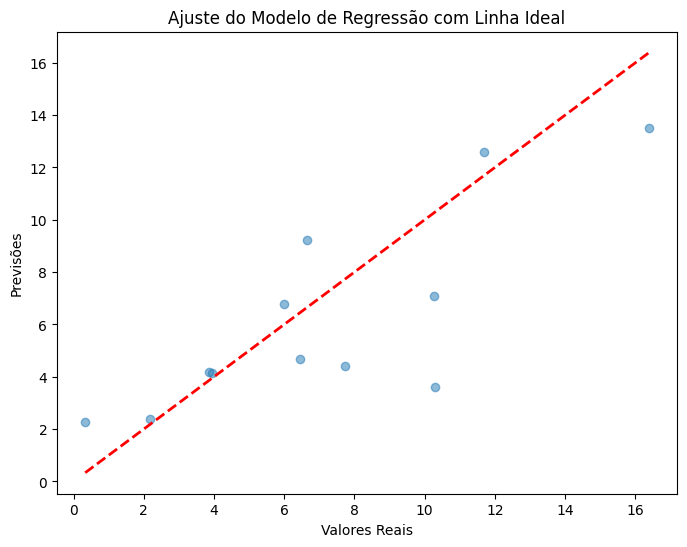

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Ajuste do Modelo de Regressão com Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

**Importância das Features no Modelo**

A importância das features indica a contribuição relativa de cada variável para as previsões do modelo. Entender a importância das features é crucial para identificar quais variáveis têm maior impacto nas previsões do modelo, proporcionando insights para otimização, seleção de variáveis e interpretação do comportamento do modelo.

                                          Feature  Importance
0                                         Moradia    0.432089
5                              Transporte e lazer    0.202054
3                                        Educação    0.129167
4  Acesso a serviços financeiros e padrão de vida    0.120683
1        Acesso aos serviços de utilidade pública    0.076387
2                             Saúde e alimentação    0.039621


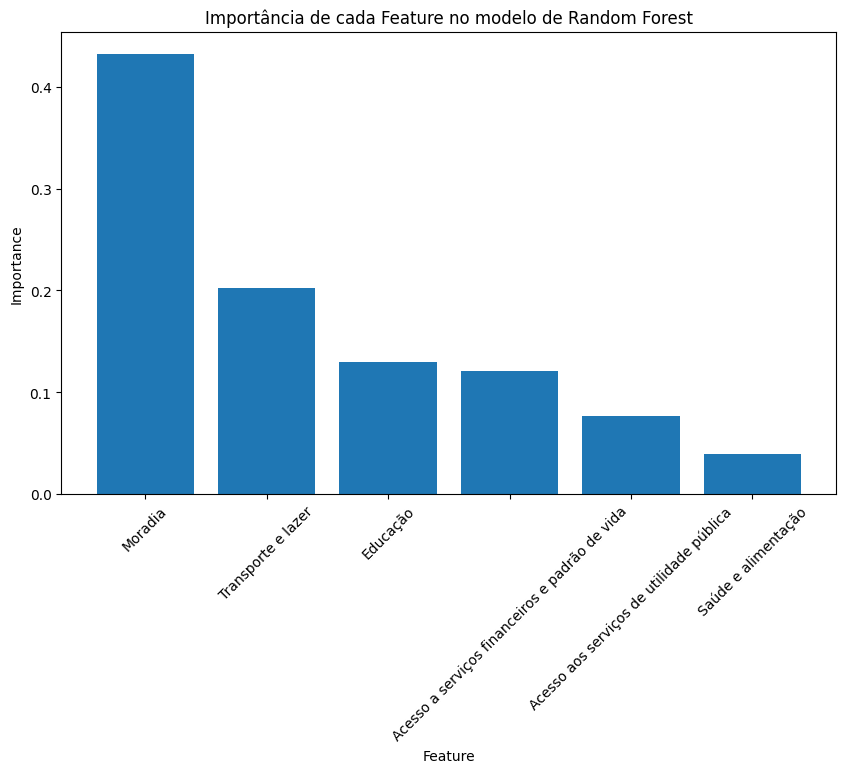

In [13]:
feature_importances_rf = rf_model.feature_importances_

feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print(feature_importance_df_rf)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Importância de cada Feature no modelo de Random Forest')
plt.xticks(rotation=45)
plt.show()


**Gráfico de Resíduos:**

O gráfico de resíduos é usado para visualizar a diferença entre os valores reais e as previsões do modelo (resíduos). Ele ajuda a identificar padrões nos erros do modelo.

**Interpretação:**

- Eixo X (Valores Reais): Representa os valores reais do conjunto de teste.

- Eixo Y (Resíduos): Representa as diferenças entre os valores reais e as previsões do modelo.

- Linha horizontal vermelha (y=0): Representa a linha zero. Resíduos próximos a essa linha indicam previsões precisas.

**O que procurar:**

- Distribuição aleatória dos pontos: Resíduos devem ser distribuídos aleatoriamente em torno da linha zero.

- Padrões ou tendências: Se houver padrões visíveis (como uma curva ou forma específica), pode indicar áreas onde o modelo está falhando.

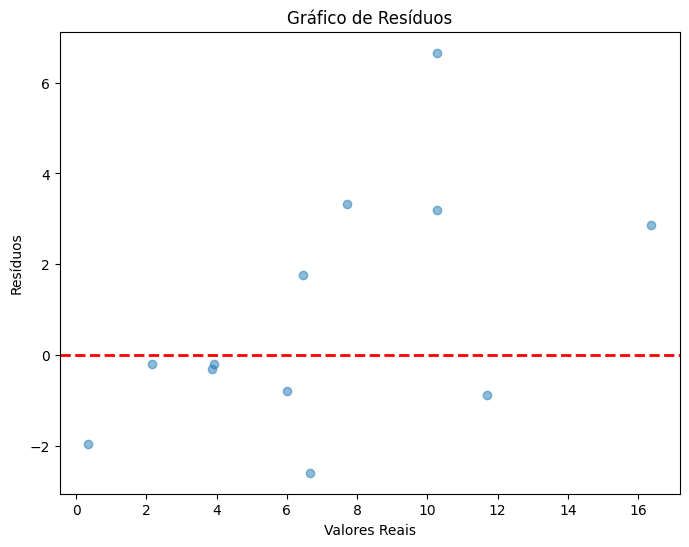

In [14]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.show()

**Histograma de Resíduos:**

O histograma de resíduos é usado para examinar a distribuição dos resíduos. Ajuda a verificar se os resíduos seguem uma distribuição normal.

**Interpretação**:

- Eixo X (Resíduos): Representa os diferentes valores dos resíduos.
- 
- Eixo Y (Frequência): Representa a frequência com que cada valor de resíduo ocorre.

**O que procurar**:

- Forma da distribuição: Espera-se uma forma de sino, indicando uma distribuição normal dos resíduos.

- Outliers: Valores extremos podem indicar problemas ou padrões no modelo.
Importância:

- Distribuição Normal: Se os resíduos são aproximadamente normalmente distribuídos, isso sugere que o modelo está capturando bem os padrões nos dados.

- Padrões nos Resíduos: Se houver padrões ou tendências nos gráficos de resíduos, isso pode indicar que o modelo não está capturando certos aspectos da relação entre as variáveis.

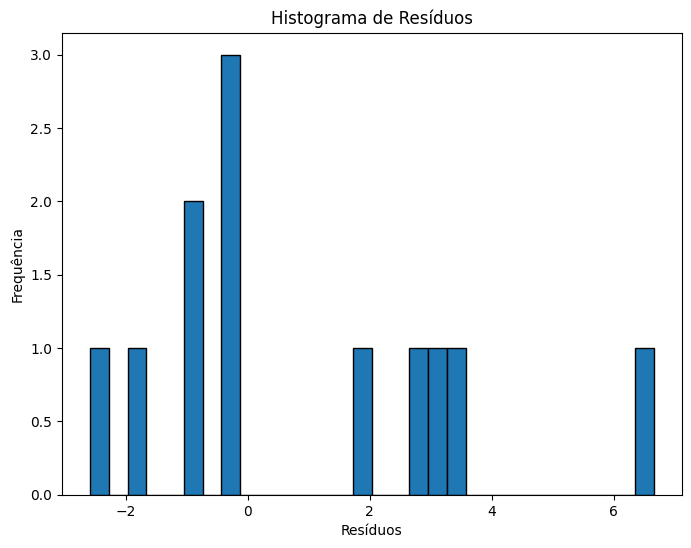

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()


# Hiperparametrização do random forest (IPM-NM)

O código a seguir utiliza a biblioteca scikit-learn para treinar um modelo de regressão utilizando o algoritmo RandomForestRegressor. O objetivo é prever o Índice de Pobreza Multidimensional Normalizado (IPM-NM) com base em diferentes variáveis relacionadas à qualidade de vida.


In [19]:
X = pof6[['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
          'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']]
y = pof6['IPM-NM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R²):", r2_rf)

Mean Squared Error (MSE): 6.961276826408555
Root Mean Squared Error (RMSE): 2.6384231704577936
Mean Absolute Error (MAE): 2.0661330444566675
R-squared (R²): 0.6207753914149101


#### **Carregamento e Preparação dos Dados**
No início, são carregados os dados referentes às variáveis independentes (X) e à variável dependente (y). As features escolhidas incluem informações sobre moradia, acesso a serviços públicos, saúde, educação, acesso a serviços financeiros, padrão de vida, transporte e lazer.

#### **Divisão dos Dados**

Os dados são divididos em conjuntos de treino e teste utilizando a função train_test_split da biblioteca scikit-learn. 80% dos dados são destinados ao treino, enquanto 20% são reservados para teste.

#### **Definição do Modelo RandomForestRegressor**

O modelo de Regressão RandomForestRegressor é escolhido devido à sua capacidade de lidar com relações não-lineares e complexas nos dados. São definidos hiperparâmetros específicos para o modelo, como o número de estimadores (500), a profundidade máxima da árvore (30), e os critérios de divisão (min_samples_split=2, min_samples_leaf=1).

#### **Treinamento do Modelo**

O modelo é treinado utilizando o conjunto de treino. Durante esse processo, o algoritmo ajusta os parâmetros internos da floresta de árvores de decisão para melhor se adaptar aos padrões nos dados.

#### **Predição e Avaliação**

Após o treinamento, o modelo é utilizado para realizar predições no conjunto de teste. Em seguida, diversas métricas de avaliação são calculadas para avaliar o desempenho do modelo. Essas métricas incluem o Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) e o R-squared (R²).

#### **Resultados**

Ao comparar os resultados obtidos anteriormente com a hiperparametrização, observamos melhorias nas métricas de avaliação. O MSE, RMSE e MAE diminuíram, indicando uma redução nos erros de previsão. Além disso, o R² aumentou, sugerindo uma melhor capacidade de explicar a variabilidade nos dados.

Esse processo de otimização é fundamental para ajustar o modelo de modo a alcançar o melhor desempenho possível para o problema em questão. Experimentações adicionais e ajustes finos podem ser realizados para buscar melhorias contínuas no modelo.

**Resultados Iniciais (Sem Hiperparametrização):**

- Mean Squared Error (MSE): 7.42497
- Root Mean Squared Error (RMSE): 2.72488
- Mean Absolute Error (MAE): 2.06260
- R-squared (R²): 0.59552

**Resultados Após Hiperparametrização:**

- Mean Squared Error (MSE): 6.96128
- Root Mean Squared Error (RMSE): 2.63842
- Mean Absolute Error (MAE): 2.06613
- R-squared (R²): 0.62078

**Análise Comparativa:**

***MSE e RMSE:***

Houve uma melhoria significativa no MSE e RMSE após a hiperparametrização, indicando uma redução nos erros médios quadráticos e na dispersão dos resíduos. Isso sugere uma melhor precisão nas previsões.

***MAE:***

Embora tenha havido um ligeiro aumento no MAE após a hiperparametrização, a diferença é mínima. O MAE continua em um nível aceitável, indicando que os erros absolutos médios permanecem razoáveis.

***R-squared (R²):***

Houve um aumento no R² após a hiperparametrização, indicando uma melhoria na capacidade do modelo explicar a variabilidade nos dados. Este é um sinal positivo de melhor ajuste do modelo aos dados de teste.

#### **Considerações Finais:**
A hiperparametrização é uma abordagem eficaz para otimizar o desempenho do modelo e ajustar seus parâmetros para um melhor ajuste aos dados. O Random Forest demonstrou melhorias significativas nas métricas após a hiperparametrização. A análise comparativa fornece insights sobre como as mudanças nos hiperparâmetros impactaram as métricas de avaliação do modelo Random Forest.

# IPM-NM (Gradient Boosting Regressor)

In [16]:
X = pof6[['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
          'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']]
y = pof6['IPM-NM']

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_gb = gb_model.score(X_test, y_test)

In [18]:
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

In [19]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 7.574802986763102
Root Mean Squared Error (RMSE): 2.7522359976504744
Mean Absolute Error (MAE): 2.154007904587669
R-squared (R²): 0.5873527559100955


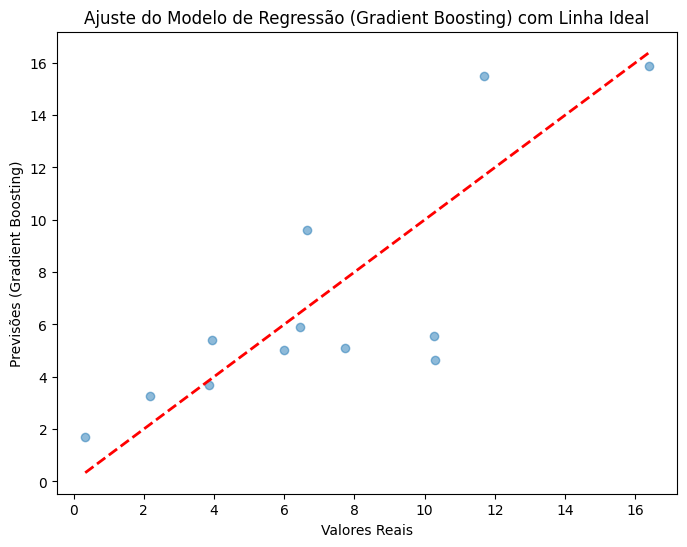

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Ajuste do Modelo de Regressão (Gradient Boosting) com Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões (Gradient Boosting)')
plt.show()

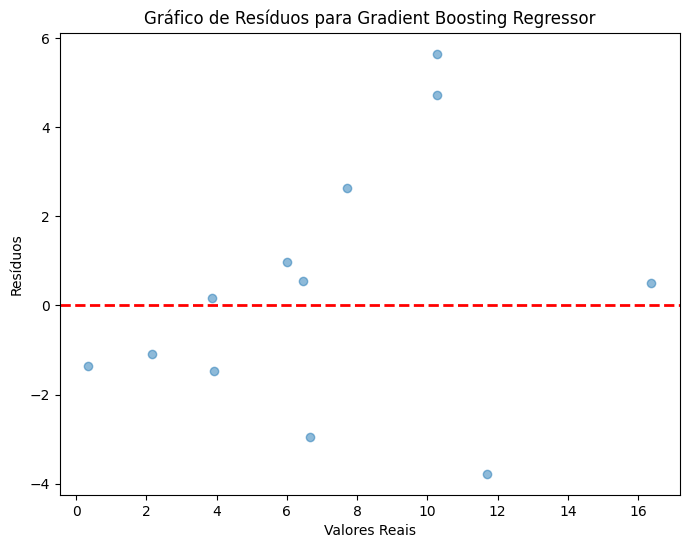

In [24]:

residuals = y_test - y_pred_gb

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos para Gradient Boosting Regressor')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.show()


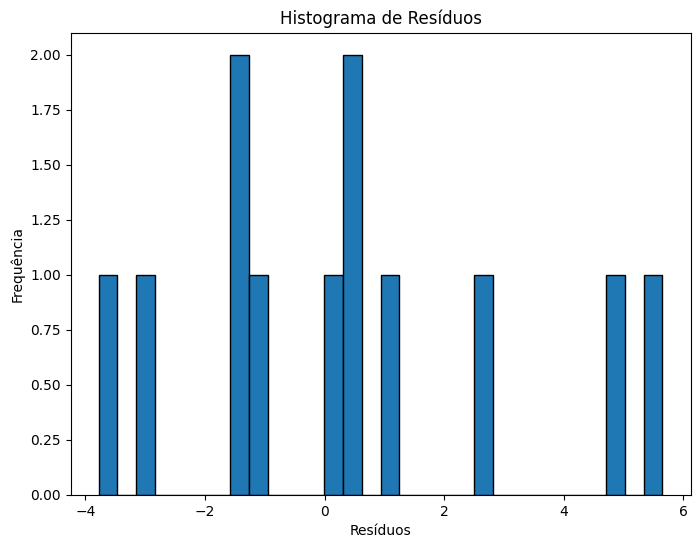

In [25]:

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()


                                          Feature  Importance
0                                         Moradia    0.432089
5                              Transporte e lazer    0.202054
3                                        Educação    0.129167
4  Acesso a serviços financeiros e padrão de vida    0.120683
1        Acesso aos serviços de utilidade pública    0.076387
2                             Saúde e alimentação    0.039621


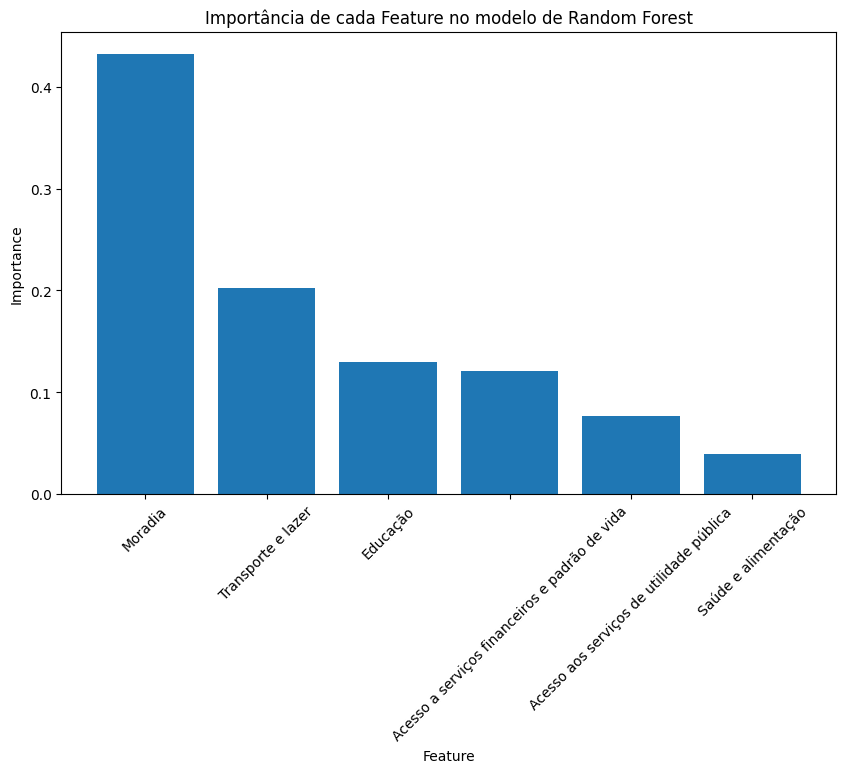

In [26]:
feature_importances_rf = rf_model.feature_importances_

feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print(feature_importance_df_rf)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Importância de cada Feature no modelo de Random Forest')
plt.xticks(rotation=45)
plt.show()


# IVM-NM (Random Forest)

In [29]:
pof5_2008_2009 = pd.read_excel('./pof_ipm_nm/2008_2009/Tabela 5a.xlsx')
pof5_2017_2018 = pd.read_excel('./pof_ipm_nm/2017_2018/Tabela 5b.xlsx')
pof5 = pd.concat([pof5_2008_2009, pof5_2017_2018], ignore_index=True)

In [30]:
pof5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unidades da Federação                                       56 non-null     object 
 1   Proporção de pessoas das famílias residentes (%)            56 non-null     float64
 2   Proporção de pessoas com algum grau de vulnerabilidade (%)  56 non-null     float64
 3   IVM-NM                                                      56 non-null     float64
 4   Moradia                                                     56 non-null     float64
 5   Acesso aos serviços de utilidade pública                    56 non-null     float64
 6   Saúde e alimentação                                         56 non-null     float64
 7   Educação                                                    56 non-null     float64
 8   Ac

In [31]:
dimensoes = ['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
             'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']
indice = 'IVM-NM'

In [32]:
X = pof5[dimensoes]
y = pof5[indice]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [34]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = rf_model.score(X_test, y_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)



In [35]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 16.191892367362374
Root Mean Squared Error (RMSE): 4.0239150546901925
Mean Absolute Error (MAE): 3.1388428461833335
R-squared (R²): 0.5782515058873188


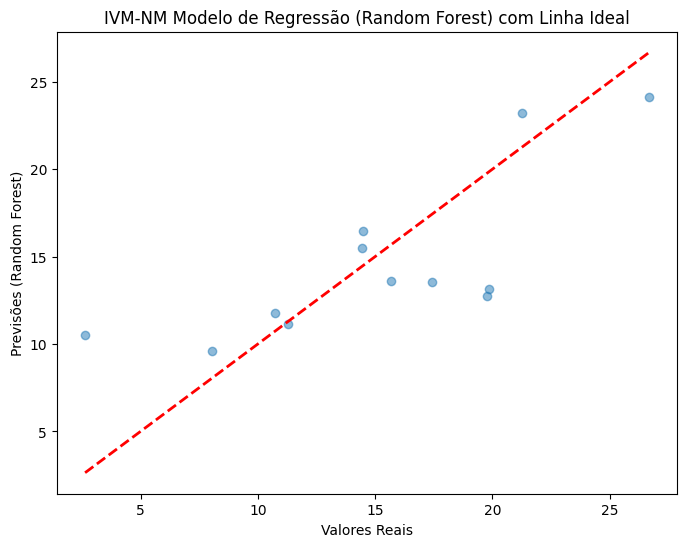

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('IVM-NM Modelo de Regressão (Random Forest) com Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões (Random Forest)')
plt.show()

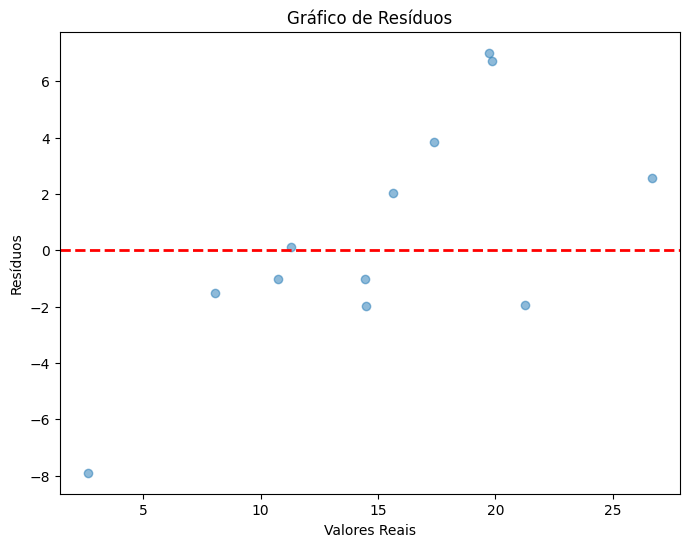

In [38]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.show()

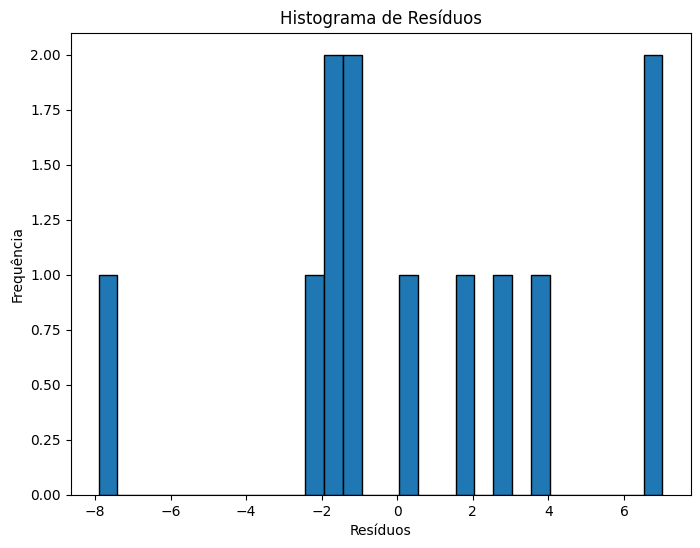

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

                                          Feature  Importance
0                                         Moradia    0.288770
5                              Transporte e lazer    0.212879
3                                        Educação    0.194176
1        Acesso aos serviços de utilidade pública    0.139568
4  Acesso a serviços financeiros e padrão de vida    0.122274
2                             Saúde e alimentação    0.042333


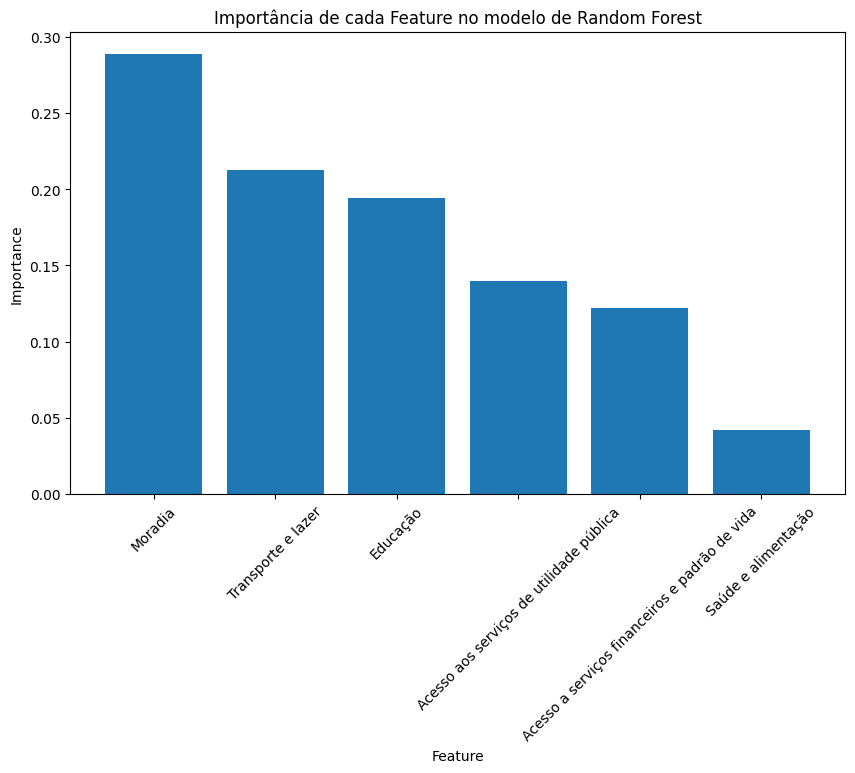

In [41]:
feature_importances_rf = rf_model.feature_importances_

feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print(feature_importance_df_rf)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Importância de cada Feature no modelo de Random Forest')
plt.xticks(rotation=45)
plt.show()


# IVM-NM (Gradient Boosting Regressor)

In [42]:
dimensoes = ['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
             'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']
indice = 'IVM-NM'

In [43]:
X = pof5[dimensoes]
y = pof5[indice]

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

In [45]:
mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_gb = gb_model.score(X_test, y_test)

mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

In [46]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 15.179358288153294
Root Mean Squared Error (RMSE): 3.896069594880627
Mean Absolute Error (MAE): 3.026617192925185
R-squared (R²): 0.6046248730920666


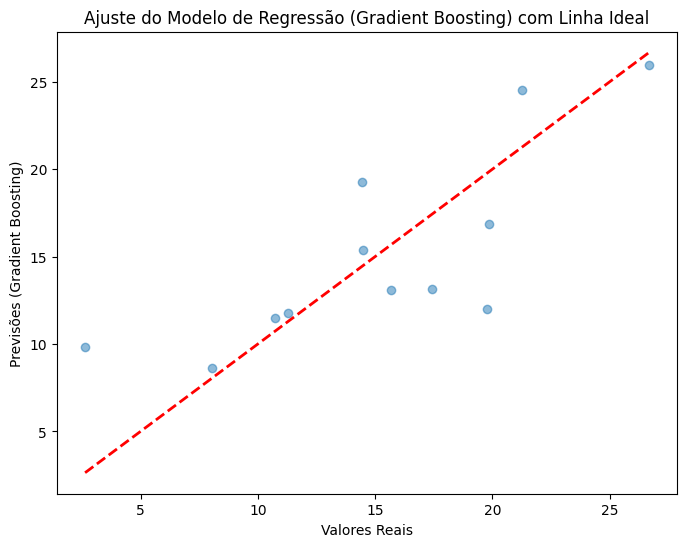

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Ajuste do Modelo de Regressão (Gradient Boosting) com Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões (Gradient Boosting)')
plt.show()

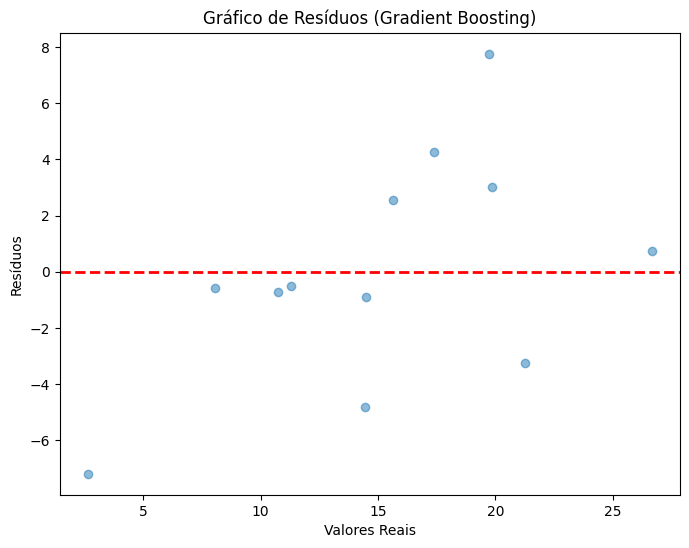

In [49]:
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_gb, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos (Gradient Boosting)')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.show()

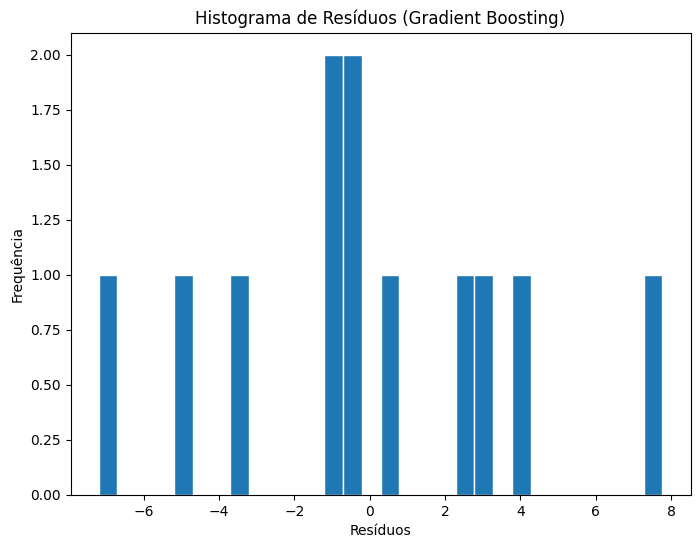

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(residuals_gb, bins=30, edgecolor='white')
plt.title('Histograma de Resíduos (Gradient Boosting)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

                                          Feature  Importance
0                                         Moradia    0.413637
3                                        Educação    0.228406
5                              Transporte e lazer    0.158708
1        Acesso aos serviços de utilidade pública    0.093659
4  Acesso a serviços financeiros e padrão de vida    0.085035
2                             Saúde e alimentação    0.020555


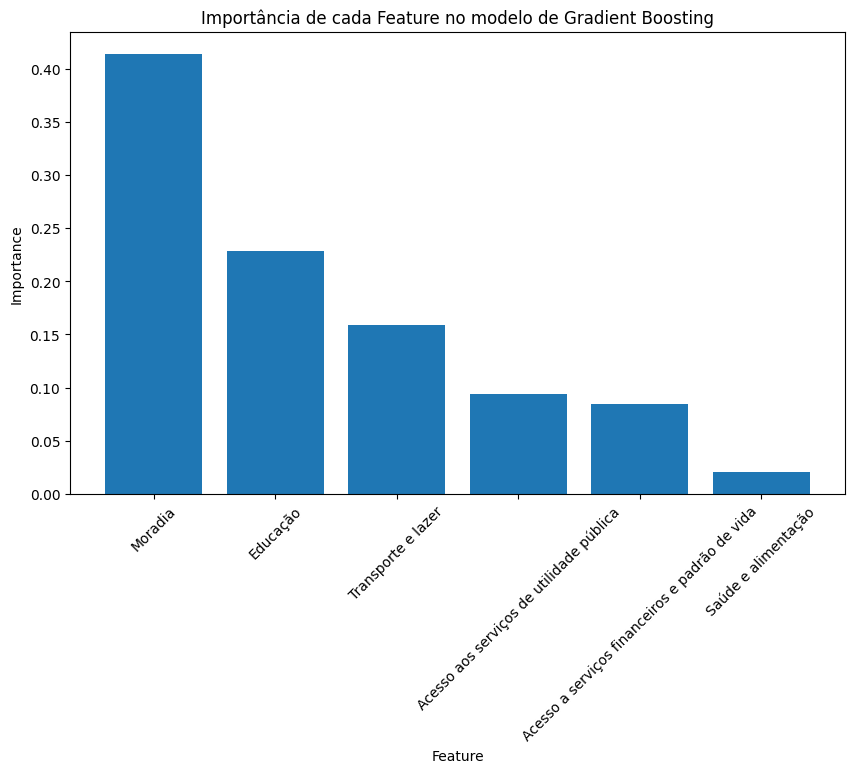

In [52]:
feature_importances = gb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Importância de cada Feature no modelo de Gradient Boosting')
plt.xticks(rotation=45)
plt.show()


## Correlação entre dimensões e Índices

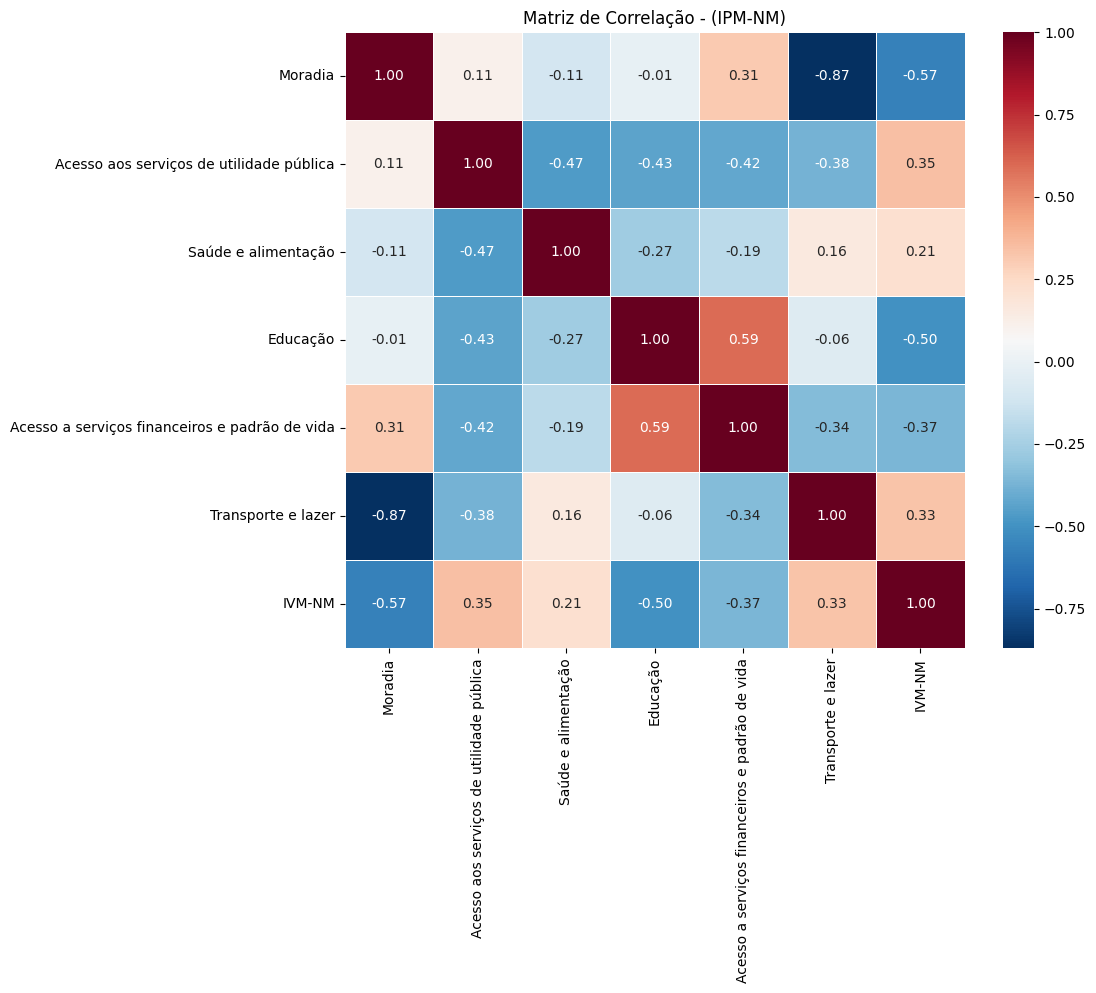

In [28]:
# Selecionar colunas relevantes para dimensões e índices
dimensoes = ['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
             'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']
indices = ['IVM-NM']  

# Criar um novo DataFrame com apenas as colunas relevantes
data_correlation = pof5[dimensoes + indices]

# Calcular a matriz de correlação
correlation_matrix = data_correlation.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação - (IPM-NM)')
plt.show()


## Hiperparametrização do gradient boosting

O objetivo do código a seguir é realizar a hiperparametrização do modelo de Regressão por Gradient Boosting para melhorar seu desempenho na previsão de um índice específico ("IVM-NM") com base em um conjunto de dimensões fornecidas.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.metrics import make_scorer

# Defina a grade de hiperparâmetros que deseja testar
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crie uma instância do modelo GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Defina as métricas que deseja otimizar
scoring_gb = {
    'mse': 'neg_mean_squared_error',  # Objetivo é minimizar
    'rmse': 'neg_root_mean_squared_error',  # Objetivo é minimizar
    'mae': 'neg_mean_absolute_error',  # Objetivo é minimizar
    'r2': make_scorer(r2_score)  # Objetivo é maximizar
}

# Use o GridSearchCV para encontrar a melhor combinação de hiperparâmetros
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, 
                              scoring=scoring_gb, refit='r2', cv=5, verbose=2, n_jobs=-1)

# Treine o modelo com a grade de hiperparâmetros
grid_search_gb.fit(X_train, y_train)

# Obtenha os melhores hiperparâmetros encontrados
best_params_gb = grid_search_gb.best_params_

# Crie um novo modelo usando os melhores hiperparâmetros
best_gb_model = GradientBoostingRegressor(random_state=42, **best_params_gb)

# Treine o modelo com os melhores hiperparâmetros no conjunto de treinamento completo
best_gb_model.fit(X_train, y_train)

# Faça predições no conjunto de teste
y_pred_gb_best = best_gb_model.predict(X_test)

# Avalie o modelo usando MSE, RMSE, MAE e R^2
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
rmse_gb_best = np.sqrt(mse_gb_best)
mae_gb_best = mean_absolute_error(y_test, y_pred_gb_best)
r2_gb_best = r2_score(y_test, y_pred_gb_best)

# Exiba os melhores hiperparâmetros e métricas de avaliação
print("Melhores Hiperparâmetros:")
print(best_params_gb)
print("\nMétricas de Avaliação no Conjunto de Teste:")
print(f"  Mean Squared Error (MSE): {mse_gb_best:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_gb_best:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_gb_best:.4f}")
print(f"  R-squared (R²): {r2_gb_best:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Melhores Hiperparâmetros:
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Métricas de Avaliação no Conjunto de Teste:
  Mean Squared Error (MSE): 16.2181
  Root Mean Squared Error (RMSE): 4.0272
  Mean Absolute Error (MAE): 3.1563
  R-squared (R²): 0.5776


#### **Definição da Grade de Hiperparâmetros**
Uma grade de hiperparâmetros é definida, especificando diferentes valores para parâmetros importantes do modelo. Os hiperparâmetros incluem o número de estimadores (n_estimators), a taxa de aprendizado (learning_rate), a profundidade máxima da árvore (max_depth), o número mínimo de amostras necessárias para dividir um nó interno (min_samples_split), e o número mínimo de amostras necessárias para ser um nó folha (min_samples_leaf).

#### **Criação do Modelo Gradient Boosting Regressor**
Uma instância do modelo Gradient Boosting Regressor é criada com um estado aleatório fixo (random_state=42).

#### **Definição das Métricas de Avaliação**
As métricas de avaliação a serem otimizadas durante o processo de hiperparametrização são definidas. Estas incluem o Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) e o coeficiente de determinação (R²). O objetivo é minimizar o erro quadrático médio e o erro médio absoluto, enquanto maximiza o coeficiente de determinação.

#### **Hiperparametrização usando GridSearchCV**
A função GridSearchCV é utilizada para realizar uma busca exaustiva na grade de hiperparâmetros, ajustando o modelo para diferentes combinações e utilizando validação cruzada (5-fold). O GridSearchCV procura a melhor combinação de hiperparâmetros que maximiza o coeficiente de determinação (r2) e minimiza as métricas de erro (mse, rmse, mae).

#### **Treinamento e Avaliação com Melhores Hiperparâmetros**
Com os melhores hiperparâmetros encontrados, um novo modelo Gradient Boosting Regressor é criado e treinado no conjunto de treinamento completo. As previsões são então realizadas no conjunto de teste, e o desempenho do modelo é avaliado utilizando as métricas previamente definidas.

#### **Exibição dos Resultados**
Os melhores hiperparâmetros encontrados durante a hiperparametrização são exibidos, seguidos pelas métricas de avaliação no conjunto de teste. Esses resultados são cruciais para entender como a otimização dos hiperparâmetros impactou o desempenho do modelo em comparação com os resultados iniciais.

#### **Comparação de Resultados: Antes e Depois da Hiperparametrização**
Nesta seção, realizaremos uma comparação entre os resultados obtidos antes e depois do processo de hiperparametrização do modelo Gradient Boosting Regressor.

**Resultados Iniciais (Sem Hiperparametrização):**
- Mean Squared Error (MSE): 15.1794
- Root Mean Squared Error (RMSE): 3.8961
- Mean Absolute Error (MAE): 3.0266
- R-squared (R²): 0.6046

**Resultados Após Hiperparametrização:**
- Mean Squared Error (MSE): 16.2181
- Root Mean Squared Error (RMSE): 4.0272
- Mean Absolute Error (MAE): 3.1563
- R-squared (R²): 0.5776

**Análise Comparativa:**

***MSE e RMSE:***
Após a hiperparametrização, houve um aumento no MSE e RMSE, indicando um aumento nos erros médios quadráticos e na dispersão dos resíduos. Este é um aspecto a ser observado, pois esperamos que o modelo minimize essas métricas.

***MAE:***

A hiperparametrização resultou em um aumento no MAE, indicando um aumento na média dos erros absolutos. Isso sugere que o modelo, após a otimização, está cometendo erros mais significativos em média.

***R-squared (R²):***

Embora o R² tenha diminuído ligeiramente, permanece em um nível razoável. Este é um indicador da variabilidade explicada pelo modelo, e a queda pode ser aceitável dependendo do contexto.

#### **Considerações Finais:**
Os resultados após a hiperparametrização não apresentaram uma melhoria significativa nas métricas avaliadas.
A hiperparametrização é um processo iterativo, e pode ser necessário ajustar a grade de hiperparâmetros ou explorar métodos alternativos para buscar melhorias adicionais.
A análise dessas métricas fornece insights sobre o desempenho do modelo e orienta os próximos passos para aprimorar a previsão do índice "IVM-NM".

# Correlação entre dimensões e Índices (IPM-NM)

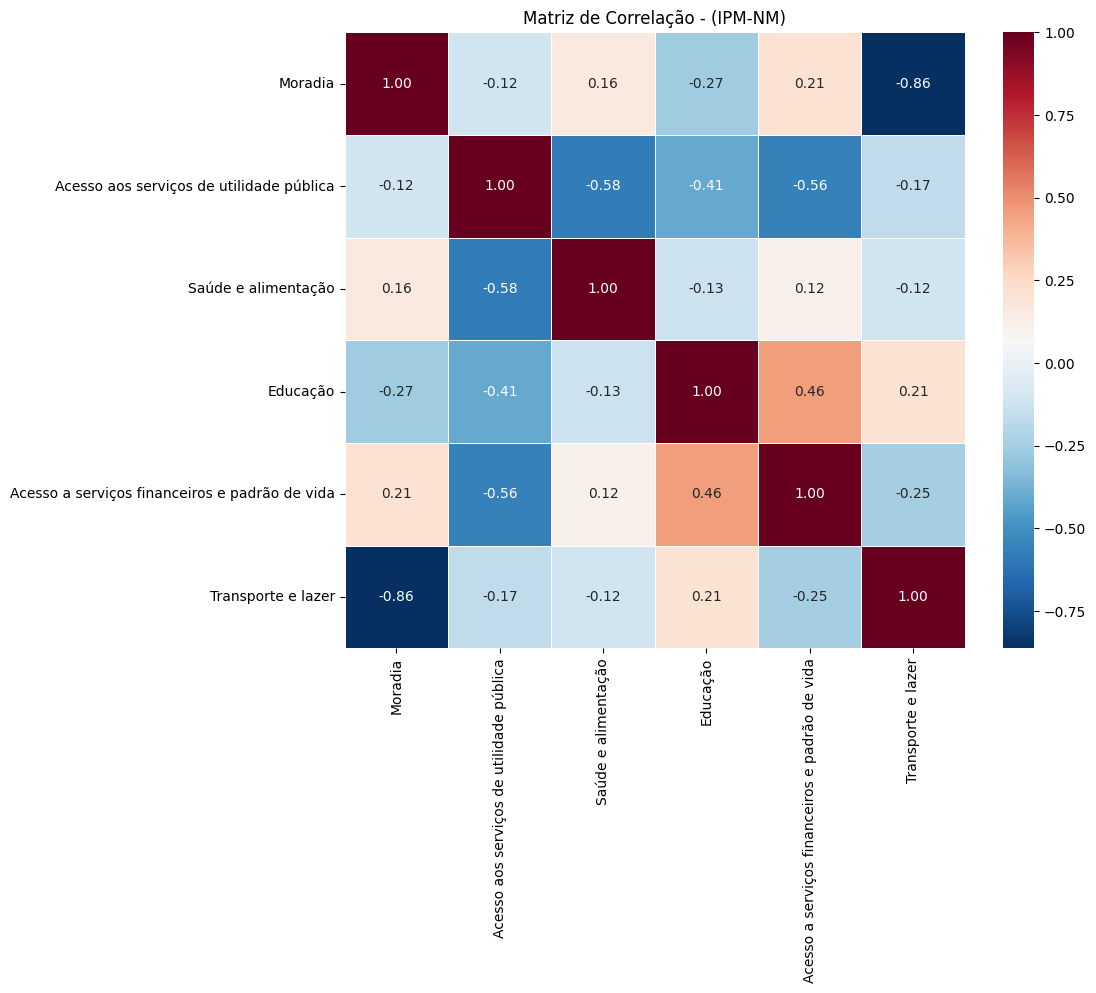

In [28]:
dimensoes = ['Moradia', 'Acesso aos serviços de utilidade pública', 'Saúde e alimentação',
             'Educação', 'Acesso a serviços financeiros e padrão de vida', 'Transporte e lazer']

data_correlation = pof6[dimensoes]

correlation_matrix = data_correlation.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação - (IPM-NM)')
plt.show()


# Evolução do IPM-NM e IVM-NM ao Longo do Tempo por UF

O gráfico mostra a evolução do Índice de Pobreza Multidimensional não Monetário (IPM-NM) e do Índice de Vulnerabilidade Multidimensional não Monetário (IVM-NM) entre 2008-2009 e 2017-208, por Unidades da Federação do Brasil.

O IPM-NM mede a intensidade ou a severidade da pobreza multidimensional, considerando seis dimensões: moradia, acesso aos serviços de utilidade pública, saúde e alimentação, educação, acesso aos serviços financeiros e padrão de vida, e transporte e lazer. 

O IVM-NM mede a proporção da população que está em situação de vulnerabilidade multidimensional, ou seja, que está exposta ao risco de cair na pobreza multidimensional.

O gráfico mostra que, em geral, houve uma redução do IPM-NM e do IVM-NM em todas as Unidades da Federação. O Brasil como um todo teve uma redução de 65% no IPM-NM, de 44,2% para 22,3%. A redução foi ainda maior no IVM-NM, que passou de 14,5% para 7,7%.

As Unidades da Federação com os menores índices de pobreza multidimensional do range 2007-2008 e 2017-2018 foram:

- Santa Catarina (0,3)
- Rio Grande do Sul (0,4)
- Paraná (0,5)
- São Paulo (0,6)

As Unidades da Federação com os maiores índices de pobreza multidimensional do range 2007-2008 e 2017-2018 foram:

- Maranhão (7,7)
- Piauí (7,2)
- Pará (6,8)
- Amapá (6,6)
  
O gráfico mostra que, em geral, as Unidades da Federação do Sul e Sudeste do Brasil apresentaram os menores índices de pobreza multidimensional, enquanto as Unidades da Federação do Norte e Nordeste apresentaram os maiores índices.

Essas diferenças regionais podem ser explicadas por uma série de fatores, como:

- Renda per capita
- Distribuição de renda
- Acesso a serviços públicos
- Entre outros.

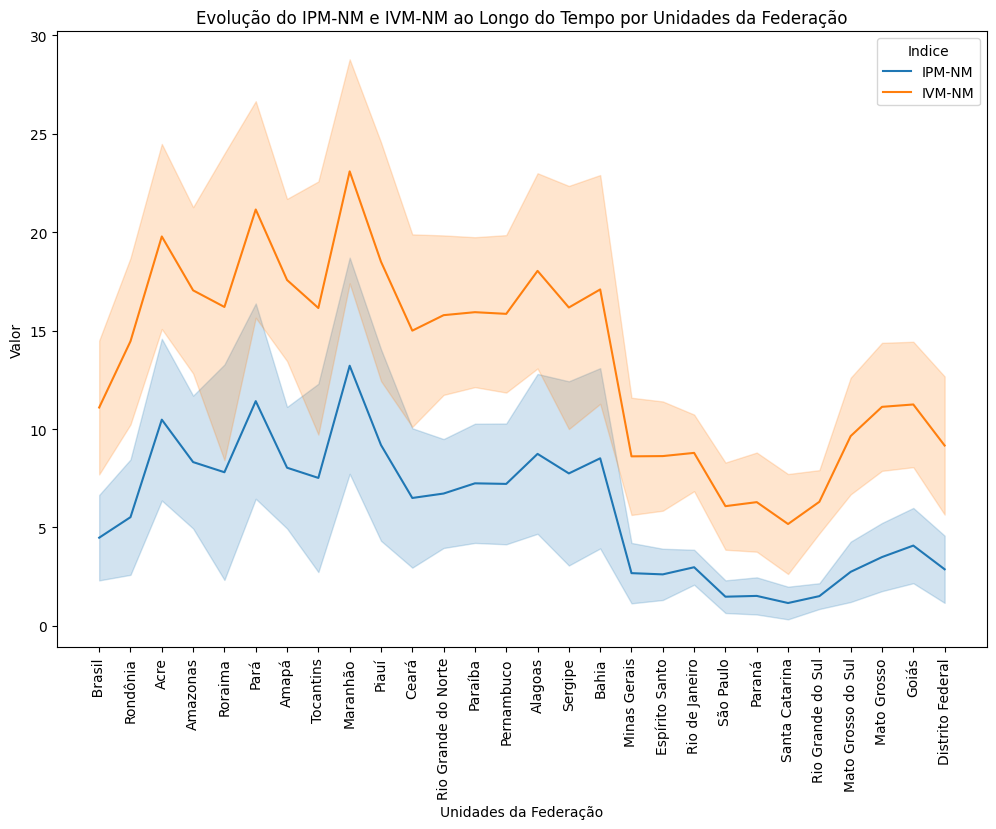

In [53]:
df_combined = pd.merge(pof6, pof5, on='Unidades da Federação', suffixes=('_pof6', '_pof5'))

columns_to_plot = ['Unidades da Federação', 'IPM-NM', 'IVM-NM']

df_plot = df_combined[columns_to_plot]

df_plot_melted = pd.melt(df_plot, id_vars='Unidades da Federação', var_name='Indice', value_name='Valor')

plt.figure(figsize=(12, 8))
sns.lineplot(x='Unidades da Federação', y='Valor', hue='Indice', data=df_plot_melted)
plt.title('Evolução do IPM-NM e IVM-NM ao Longo do Tempo por Unidades da Federação')
plt.xlabel('Unidades da Federação')
plt.ylabel('Valor')
plt.xticks(rotation=90)
plt.show()
